<a href="https://colab.research.google.com/github/nathaliemondoukpe12/app_gest_task/blob/main/analyseDiagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importer les bibliothèques nécessaires :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/education_dataset.csv')

In [ ]:
data.head()

,student_id,age,gender,hours_study_per_week,attendance_rate,parent_education_level,school_type,math_score,reading_score,final_result
0,1,15,M,16,68.6,medium,public,61,96,pass
1,2,14,F,1,92.2,medium,private,67,95,fail
2,3,16,F,13,72.6,medium,public,80,31,pass
3,4,17,M,16,80.8,high,public,21,82,fail
4,5,14,F,6,96.0,medium,public,2,49,pass


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              50 non-null     int64  
 1   age                     50 non-null     int64  
 2   gender                  50 non-null     object 
 3   hours_study_per_week    50 non-null     int64  
 4   attendance_rate         50 non-null     float64
 5   parent_education_level  50 non-null     object 
 6   school_type             50 non-null     object 
 7   math_score              50 non-null     int64  
 8   reading_score           50 non-null     int64  
 9   final_result            50 non-null     object 
dtypes: float64(1), int64(5), object(4)
memory usage: 4.0+ KB


In [ ]:
# nombre de lignes
nombre_de_lignes = len(data)


print(nombre_de_lignes)

50


In [ ]:
display(data.describe().round(1))

,student_id,age,hours_study_per_week,attendance_rate,math_score,reading_score
count,50.0,50.0,50.0,50.0,50.0,50.0
mean,25.5,14.5,9.1,76.7,48.5,52.3
std,14.6,1.6,5.7,14.5,27.0,26.2
min,1.0,12.0,0.0,50.0,0.0,1.0
25%,13.2,13.0,4.2,66.1,27.5,33.2
50%,25.5,14.5,8.5,80.0,50.5,54.5
75%,37.8,16.0,13.0,88.9,70.8,75.2
max,50.0,17.0,18.0,99.6,99.0,99.0


In [ ]:
# Calculer la distribution en pourcentage de la variable 'final_result'
distribution = data['final_result'].value_counts(normalize=True) * 100

# Afficher la distribution
print(distribution)

final_result
pass    52.0
fail    48.0
Name: proportion, dtype: float64


In [ ]:
#traitement des valeurs manquantes
data.isnull().sum()



,0
student_id,0
age,0
gender,0
hours_study_per_week,0
attendance_rate,0
parent_education_level,0
school_type,0
math_score,0
reading_score,0
final_result,0


In [ ]:
# traitement des valeurs abbérantes



In [ ]:
import numpy as np

# Calculer la médiane de 'math_score'
median_math_score = data['math_score'].median()

# Définir une fonction pour détecter les outliers en utilisant la méthode IQR (Interquartile Range)
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Retourner un masque booléen pour les outliers
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Créer une nouvelle colonne pour stocker les scores en mathématiques traités
data['math_score_median_imputed'] = data['math_score'].copy()

# Identifier les outliers dans 'math_score'
outliers_mask = find_outliers_iqr(data, 'math_score')

# Remplacer les outliers par la médiane
data.loc[outliers_mask, 'math_score_median_imputed'] = median_math_score

print(f"Médiane de math_score : {median_math_score:.2f}")
print("Nombre d'outliers identifiés et remplacés dans math_score :", outliers_mask.sum())
print("Comparaison des statistiques avant et après remplacement par la médiane :")
print(data[['math_score', 'math_score_median_imputed']].describe().round(2))

Médiane de math_score : 50.50
Nombre d'outliers identifiés et remplacés dans math_score : 0
Comparaison des statistiques avant et après remplacement par la médiane :
       math_score  math_score_median_imputed
count       50.00                      50.00
mean        48.52                      48.52
std         27.05                      27.05
min          0.00                       0.00
25%         27.50                      27.50
50%         50.50                      50.50
75%         70.75                      70.75
max         99.00                      99.00


/tmp/ipython-input-2715396996.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outliers_mask, 'math_score_median_imputed'] = median_math_score


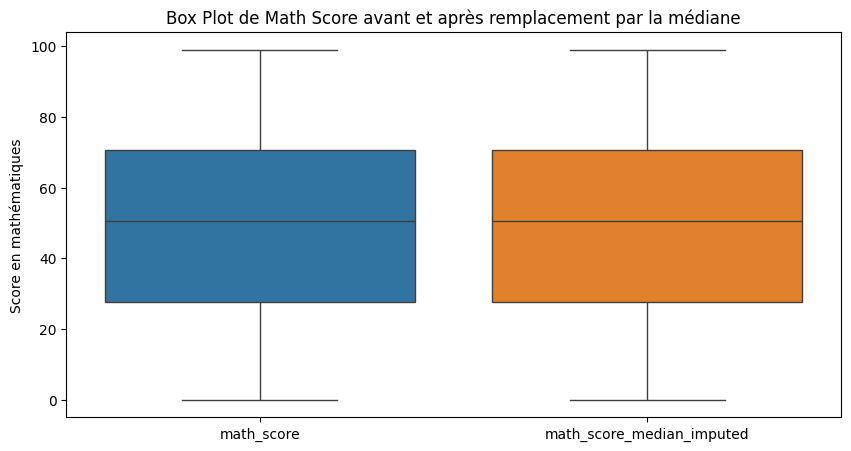

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de l'effet du remplacement par la médiane pour 'math_score' avec un box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['math_score', 'math_score_median_imputed']])
plt.title('Box Plot de Math Score avant et après remplacement par la médiane')
plt.ylabel('Score en mathématiques')
plt.show()

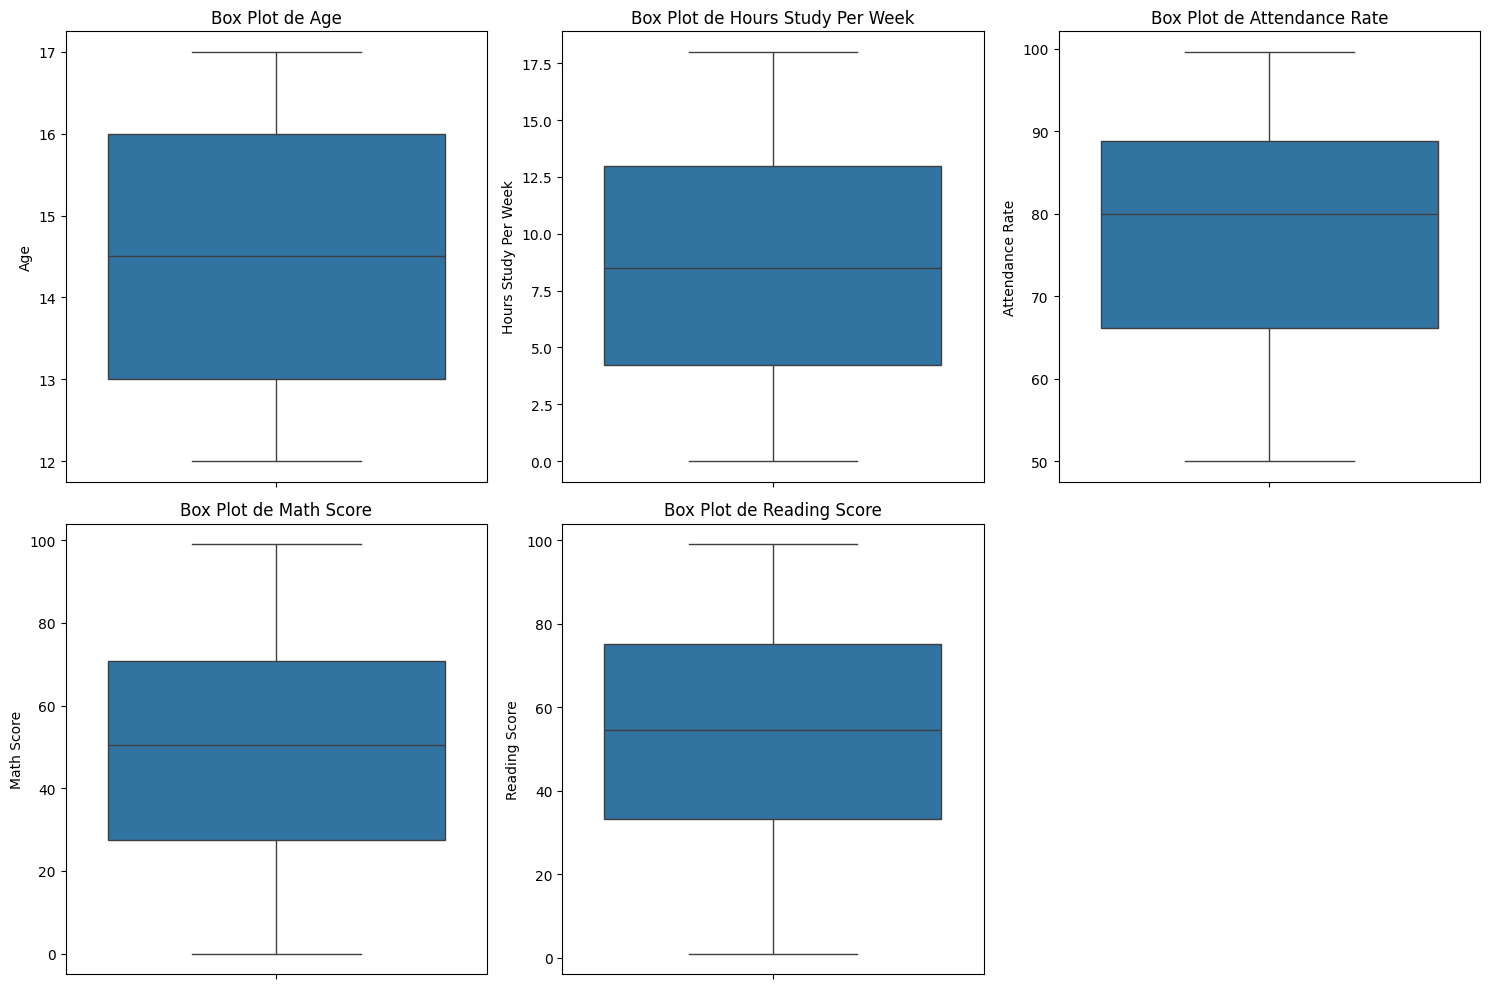

In [ ]:
numerical_columns = ['age', 'hours_study_per_week', 'attendance_rate', 'math_score', 'reading_score']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot de {column.replace("_", " ").title()}')
    plt.ylabel(column.replace("_", " ").title())
plt.tight_layout()
plt.show()


In [ ]:
columns_to_average = ['hours_study_per_week', 'attendance_rate', 'math_score', 'reading_score']
average_scores_by_result = data.groupby('final_result')[columns_to_average].mean()
print("Moyennes des scores par résultat final :\n")
print(average_scores_by_result)

Moyennes des scores par résultat final :

              hours_study_per_week  attendance_rate  math_score  reading_score
final_result                                                                  
fail                      8.750000        78.712500   49.291667      53.583333
pass                      9.346154        74.803846   47.807692      51.038462


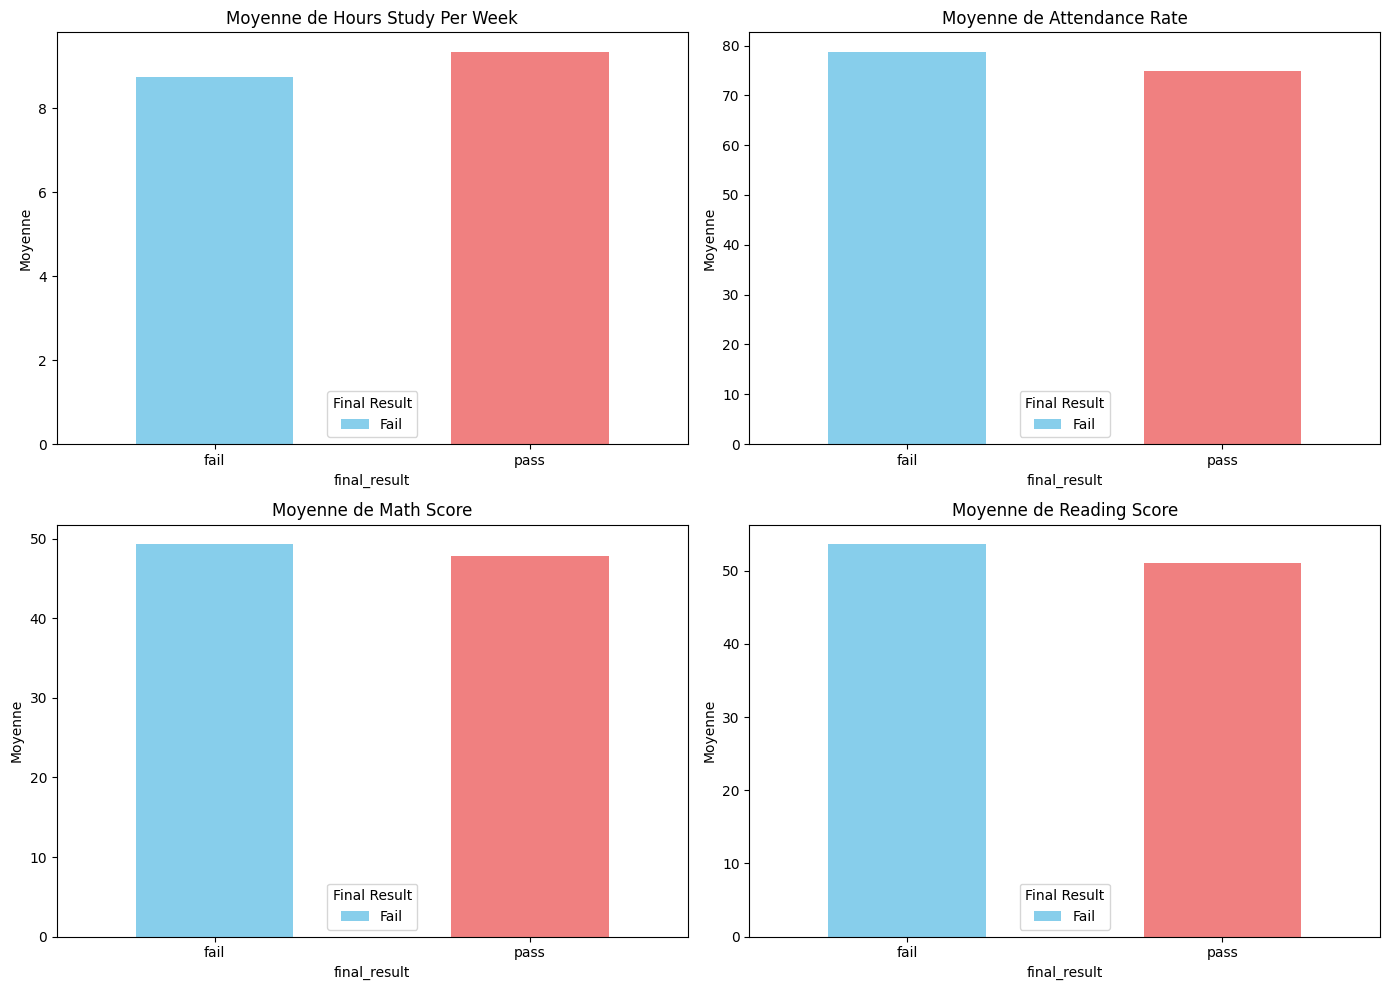

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_average):
    average_scores_by_result[column].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral'])
    axes[i].set_title(f'Moyenne de {column.replace("_", " ").title()}')
    axes[i].set_ylabel('Moyenne')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].legend(['Fail', 'Pass'], title='Final Result')

plt.tight_layout()
plt.show()

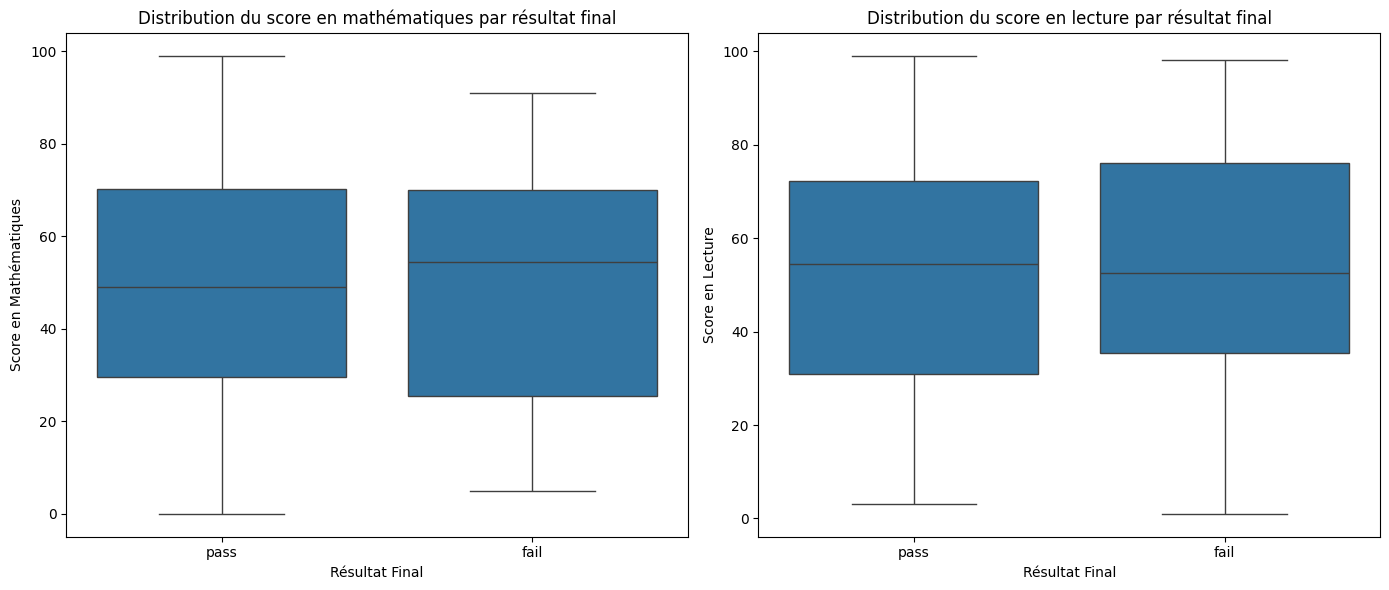

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot for Math Score by Final Result
sns.boxplot(x='final_result', y='math_score', data=data, ax=axes[0])
axes[0].set_title('Distribution du score en mathématiques par résultat final')
axes[0].set_xlabel('Résultat Final')
axes[0].set_ylabel('Score en Mathématiques')

# Box Plot for Reading Score by Final Result
sns.boxplot(x='final_result', y='reading_score', data=data, ax=axes[1])
axes[1].set_title('Distribution du score en lecture par résultat final')
axes[1].set_xlabel('Résultat Final')
axes[1].set_ylabel('Score en Lecture')

plt.tight_layout()
plt.show()

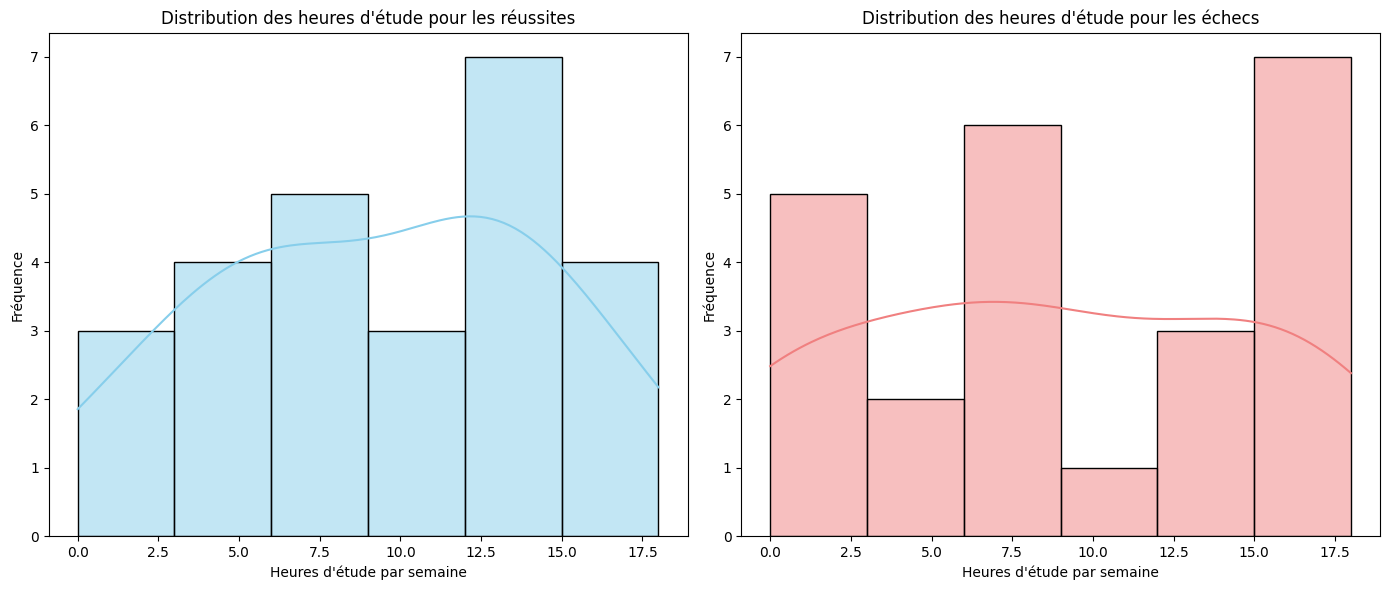

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for 'pass' students
sns.histplot(data[data['final_result'] == 'pass']['hours_study_per_week'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution des heures d'étude pour les réussites")
axes[0].set_xlabel("Heures d'étude par semaine")
axes[0].set_ylabel("Fréquence")

# Histogram for 'fail' students
sns.histplot(data[data['final_result'] == 'fail']['hours_study_per_week'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title("Distribution des heures d'étude pour les échecs")
axes[1].set_xlabel("Heures d'étude par semaine")
axes[1].set_ylabel("Fréquence")

plt.tight_layout()
plt.show()

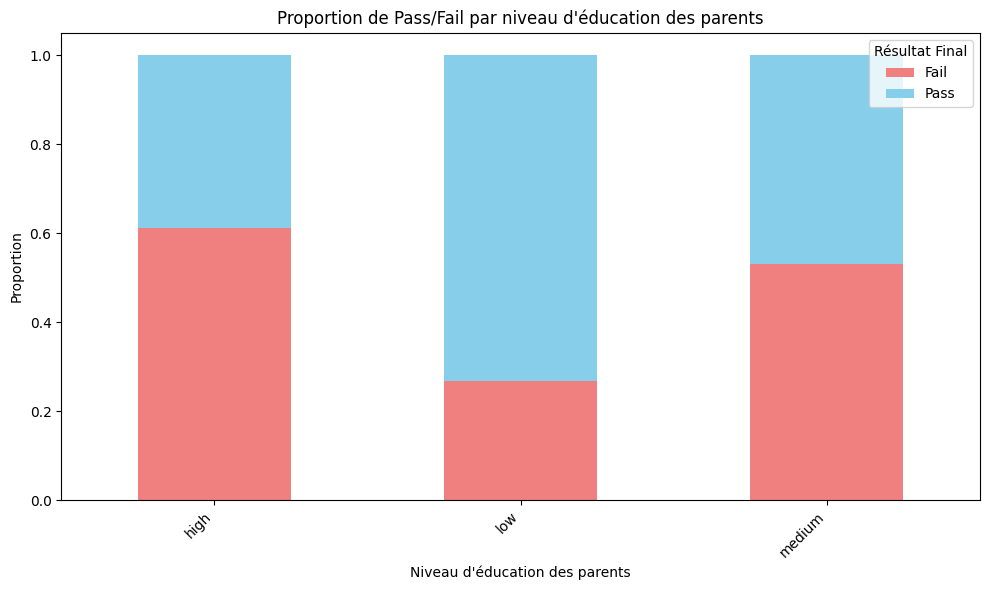

In [ ]:
education_result_proportion = data.groupby('parent_education_level')['final_result'].value_counts(normalize=True).unstack()

education_result_proportion.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'skyblue'])
plt.title('Proportion de Pass/Fail par niveau d\'éducation des parents')
plt.xlabel('Niveau d\'éducation des parents')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Résultat Final', labels=['Fail', 'Pass'])
plt.tight_layout()
plt.show()

In [ ]:
data['final_result_encoded'] = data['final_result'].map({'pass': 1, 'fail': 0})
print("La colonne 'final_result_encoded' a été créée et encodée.")
print(data[['final_result', 'final_result_encoded']].head())

La colonne 'final_result_encoded' a été créée et encodée.
  final_result  final_result_encoded
0         pass                     1
1         fail                     0
2         pass                     1
3         fail                     0
4         pass                     1


In [ ]:
numerical_columns_for_corr = data.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = data[numerical_columns_for_corr].corr()

print("Matrice de corrélation calculée.")
print(correlation_matrix)

Matrice de corrélation calculée.
                      student_id       age  hours_study_per_week  \
student_id              1.000000 -0.247270             -0.083978   
age                    -0.247270  1.000000              0.251870   
hours_study_per_week   -0.083978  0.251870              1.000000   
attendance_rate        -0.339321 -0.021690              0.050077   
math_score              0.008489 -0.097630              0.131953   
reading_score          -0.169391  0.189680              0.048327   
final_result_encoded    0.091544 -0.037959              0.052539   

                      attendance_rate  math_score  reading_score  \
student_id                  -0.339321    0.008489      -0.169391   
age                         -0.021690   -0.097630       0.189680   
hours_study_per_week         0.050077    0.131953       0.048327   
attendance_rate              1.000000    0.151722      -0.240866   
math_score                   0.151722    1.000000       0.088522   
reading_score 

In [ ]:
final_result_correlations = correlation_matrix['final_result_encoded'].drop('final_result_encoded')
absolute_correlations = final_result_correlations.abs().sort_values(ascending=False)
top_3_correlated_features = absolute_correlations.head(3)

print("Les 3 variables numériques les plus influentes avec 'final_result' (corrélation absolue) sont :\n")
for feature in top_3_correlated_features.index:
    original_correlation = final_result_correlations[feature]
    print(f"- {feature}: {original_correlation:.4f}")

Les 3 variables numériques les plus influentes avec 'final_result' (corrélation absolue) sont :

- attendance_rate: -0.1359
- student_id: 0.0915
- hours_study_per_week: 0.0525


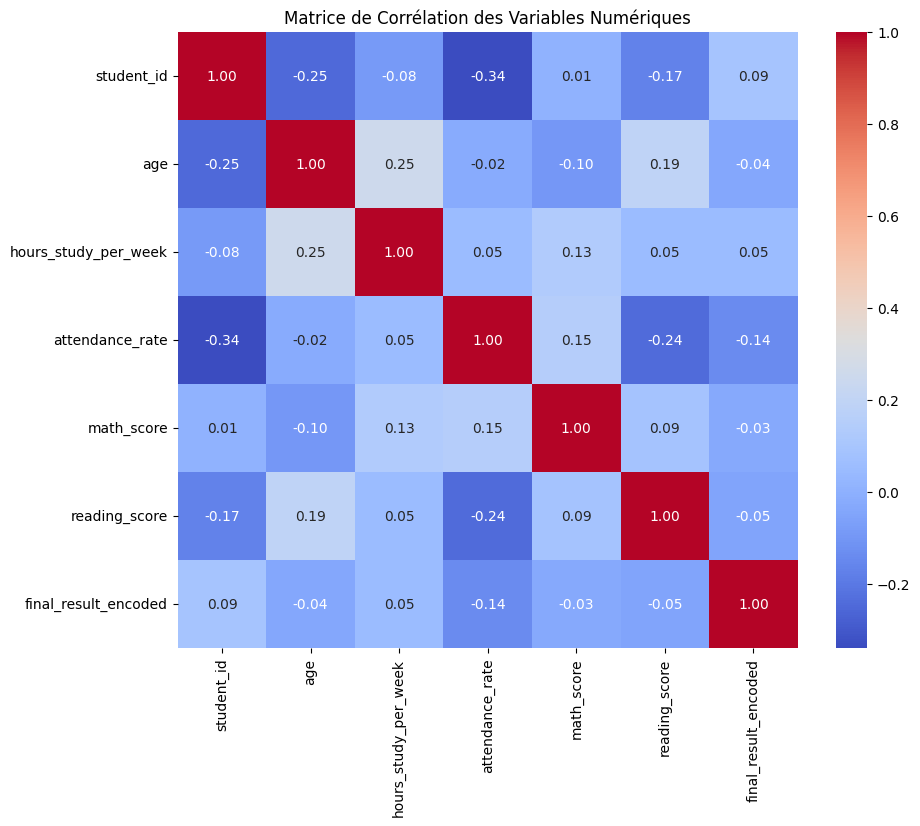

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()